In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


1- read the dataset

In [18]:
df = pd.read_csv('height-weight.csv',index_col = False)

In [19]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

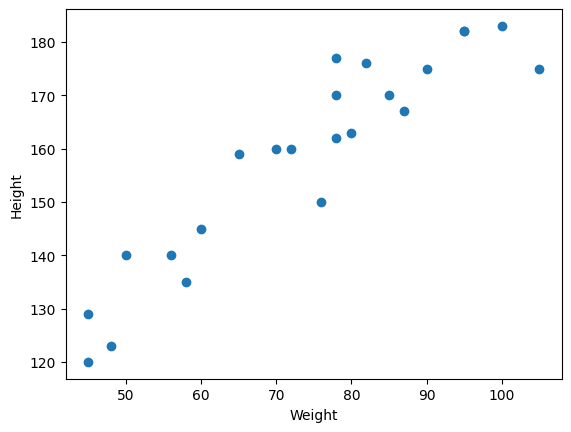

In [20]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

2 - divide dependent n independent feature


In [5]:
from sklearn.model_selection import train_test_split

In [37]:
X = df[['Weight']]
Y = df['Height']

In [38]:
X

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [40]:
Y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

3 - Train test split

In [41]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20,random_state=42)

In [42]:
X.shape

(23, 1)

In [43]:
Y.shape

(23,)

3 -     Standardize the data

In [90]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [114]:
X_train = scaler.fit_transform(X_train)
x_test= scaler.transform(X_test)


/Users/user/Desktop/a/venv/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


4 - Train the simple linear regression model

In [92]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()


In [93]:
linear.fit(X_train,Y_train)

LinearRegression()

In [94]:
# 1 independent feature so it will have only 1 coefficent (slope)
print(f"The slope or coefficent of weight is: {linear.coef_}" )
print(f"The intercept is: {linear.intercept_}" )

The slope or coefficent of weight is: [17.03440872]
The intercept is: 157.5


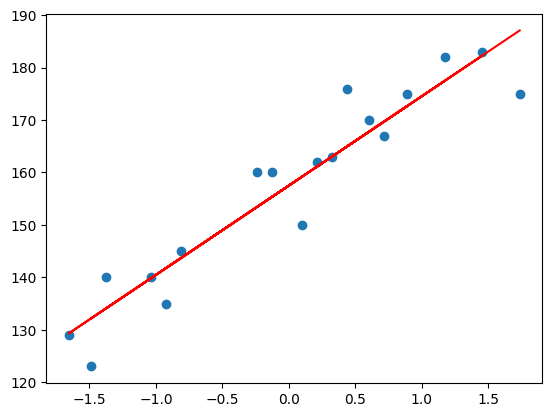

In [95]:
plt.scatter(X_train,Y_train)
plt.plot(X_train,linear.predict(X_train),"r")

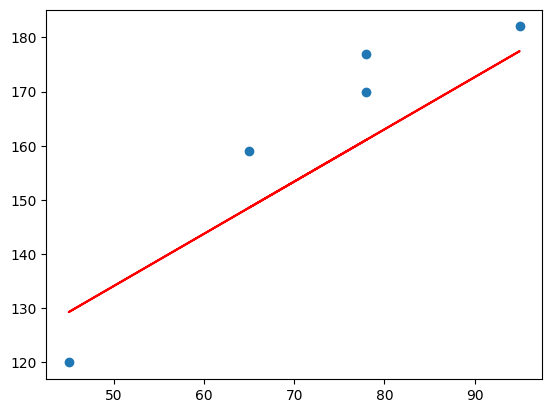

In [71]:
#prediction for x test 
plt.scatter(X_test,Y_test)
y_pred_test = linear.predict(x_test)
plt.plot(X_test,y_pred_test,"r")

# performance metrics 

# MSE, MAE
# R square and adjusted R square


In [96]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

mse = mean_squared_error(Y_test,y_pred_test)
mae = mean_absolute_error(Y_test,y_pred_test)
rmse = np.sqrt(mse)

print("MSE: ",round(mse,2))
print("MAE: ",round(mae,2))
print("RMSE: ",round(rmse,2))


MSE:  109.78
MAE:  9.82
RMSE:  10.48


In [97]:
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred_test)
print(round(score,2))


0.78


In [98]:
x_test.shape

(5, 1)

In [99]:
# adjusted r2
adj_score = 1 - (1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)


In [100]:
print(round(adj_score,3))

0.703


In [127]:
# new data point

# give it in 2 dimension form coz we trained the model with 2 dimensional x
scaled_weight = scaler.transform([[80]])



In [128]:
linear.predict(scaled_weight)

array([1520.25269753])

# assumptions

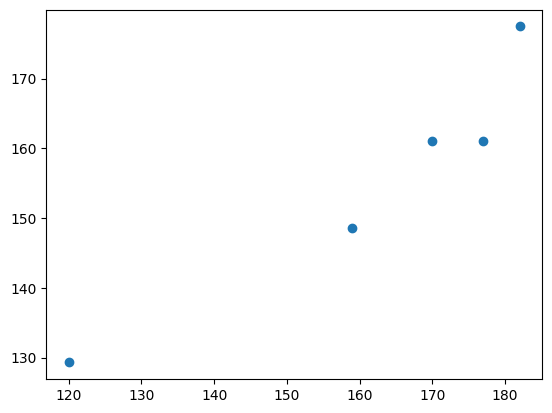

In [129]:
plt.scatter(Y_test,y_pred_test)
# it should be linear pattern

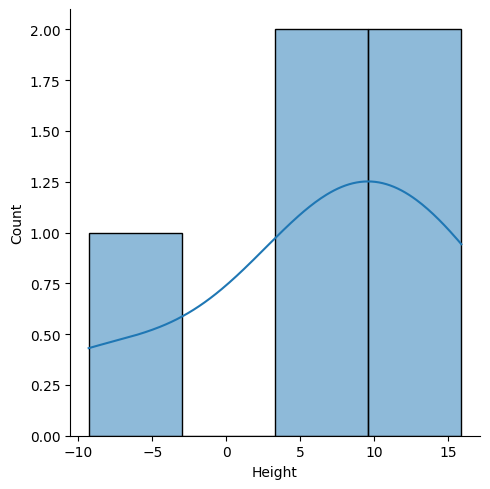

In [130]:
# residuals
residuals = Y_test - y_pred_test
import seaborn as sns
sns.displot(residuals,kde=True)

# if its close to normal distribution or is normal dist then the model is good

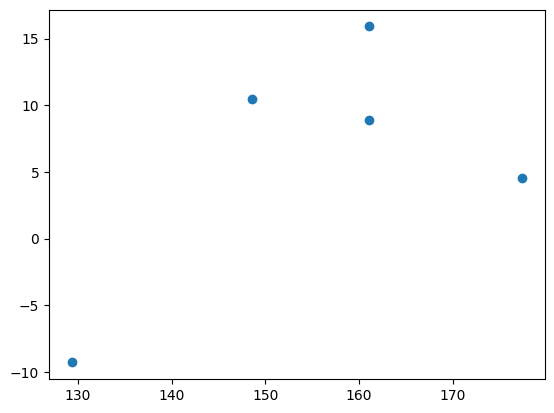

In [131]:
# it should be uniform distribution, datapoits should be scattered here there
plt.scatter(y_pred_test,residuals)